In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

In [2]:
data = {
    "Name": ["Walmart", "Sinopec Group", "State Grid", "China National Petroleum", "Royal Dutch Shell", 
            "Saudi Aramco", "Volkswagen", "BP", "Amazon.com", "Toyota Motor"],
    "Revenue": [523964.0, 407009.0, 383906.0, 379130.0, 352106.0, 329784.0, 282760, 
               282616.0, 280522.0, 275288.0],
    "Revenue Change": [1.9, -1.8, -0.8, -3.5, -11.2, -7.3, 1.6, -7, 20.5, 1],
    "Profit": [14881.0, 6793.2, 7970.0, 4443.2, 15842.0, 88210.9, 15542, 4026, 11588, 
              19096.2],
    "Profit Change": [123.1, 16.2, -2.5, 95.7, 32.2, -20.5, 8.5, -57.1, 15, 12.4],
}
new_top_10_companies = pd.DataFrame(data)
new_top_10_companies

,Name,Revenue,Revenue Change,Profit,Profit Change
0,Walmart,523964.0,1.9,14881.0,123.1
1,Sinopec Group,407009.0,-1.8,6793.2,16.2
2,State Grid,383906.0,-0.8,7970.0,-2.5
3,China National Petroleum,379130.0,-3.5,4443.2,95.7
4,Royal Dutch Shell,352106.0,-11.2,15842.0,32.2
5,Saudi Aramco,329784.0,-7.3,88210.9,-20.5
6,Volkswagen,282760.0,1.6,15542.0,8.5
7,BP,282616.0,-7.0,4026.0,-57.1
8,Amazon.com,280522.0,20.5,11588.0,15.0
9,Toyota Motor,275288.0,1.0,19096.2,12.4


In [6]:
new_top_10_companies["Percent"] = (new_top_10_companies["Revenue"] - new_top_10_companies["Profit"])/new_top_10_companies["Revenue"] * 100
new_top_10_companies

,Name,Revenue,Revenue Change,Profit,Profit Change,Percent
0,Walmart,523964.0,1.9,14881.0,123.1,97.159919
1,Sinopec Group,407009.0,-1.8,6793.2,16.2,98.330946
2,State Grid,383906.0,-0.8,7970.0,-2.5,97.923971
3,China National Petroleum,379130.0,-3.5,4443.2,95.7,98.828054
4,Royal Dutch Shell,352106.0,-11.2,15842.0,32.2,95.500787
5,Saudi Aramco,329784.0,-7.3,88210.9,-20.5,73.251916
6,Volkswagen,282760.0,1.6,15542.0,8.5,94.503466
7,BP,282616.0,-7.0,4026.0,-57.1,98.575452
8,Amazon.com,280522.0,20.5,11588.0,15.0,95.869130
9,Toyota Motor,275288.0,1.0,19096.2,12.4,93.063192


## Revenue vs Profit

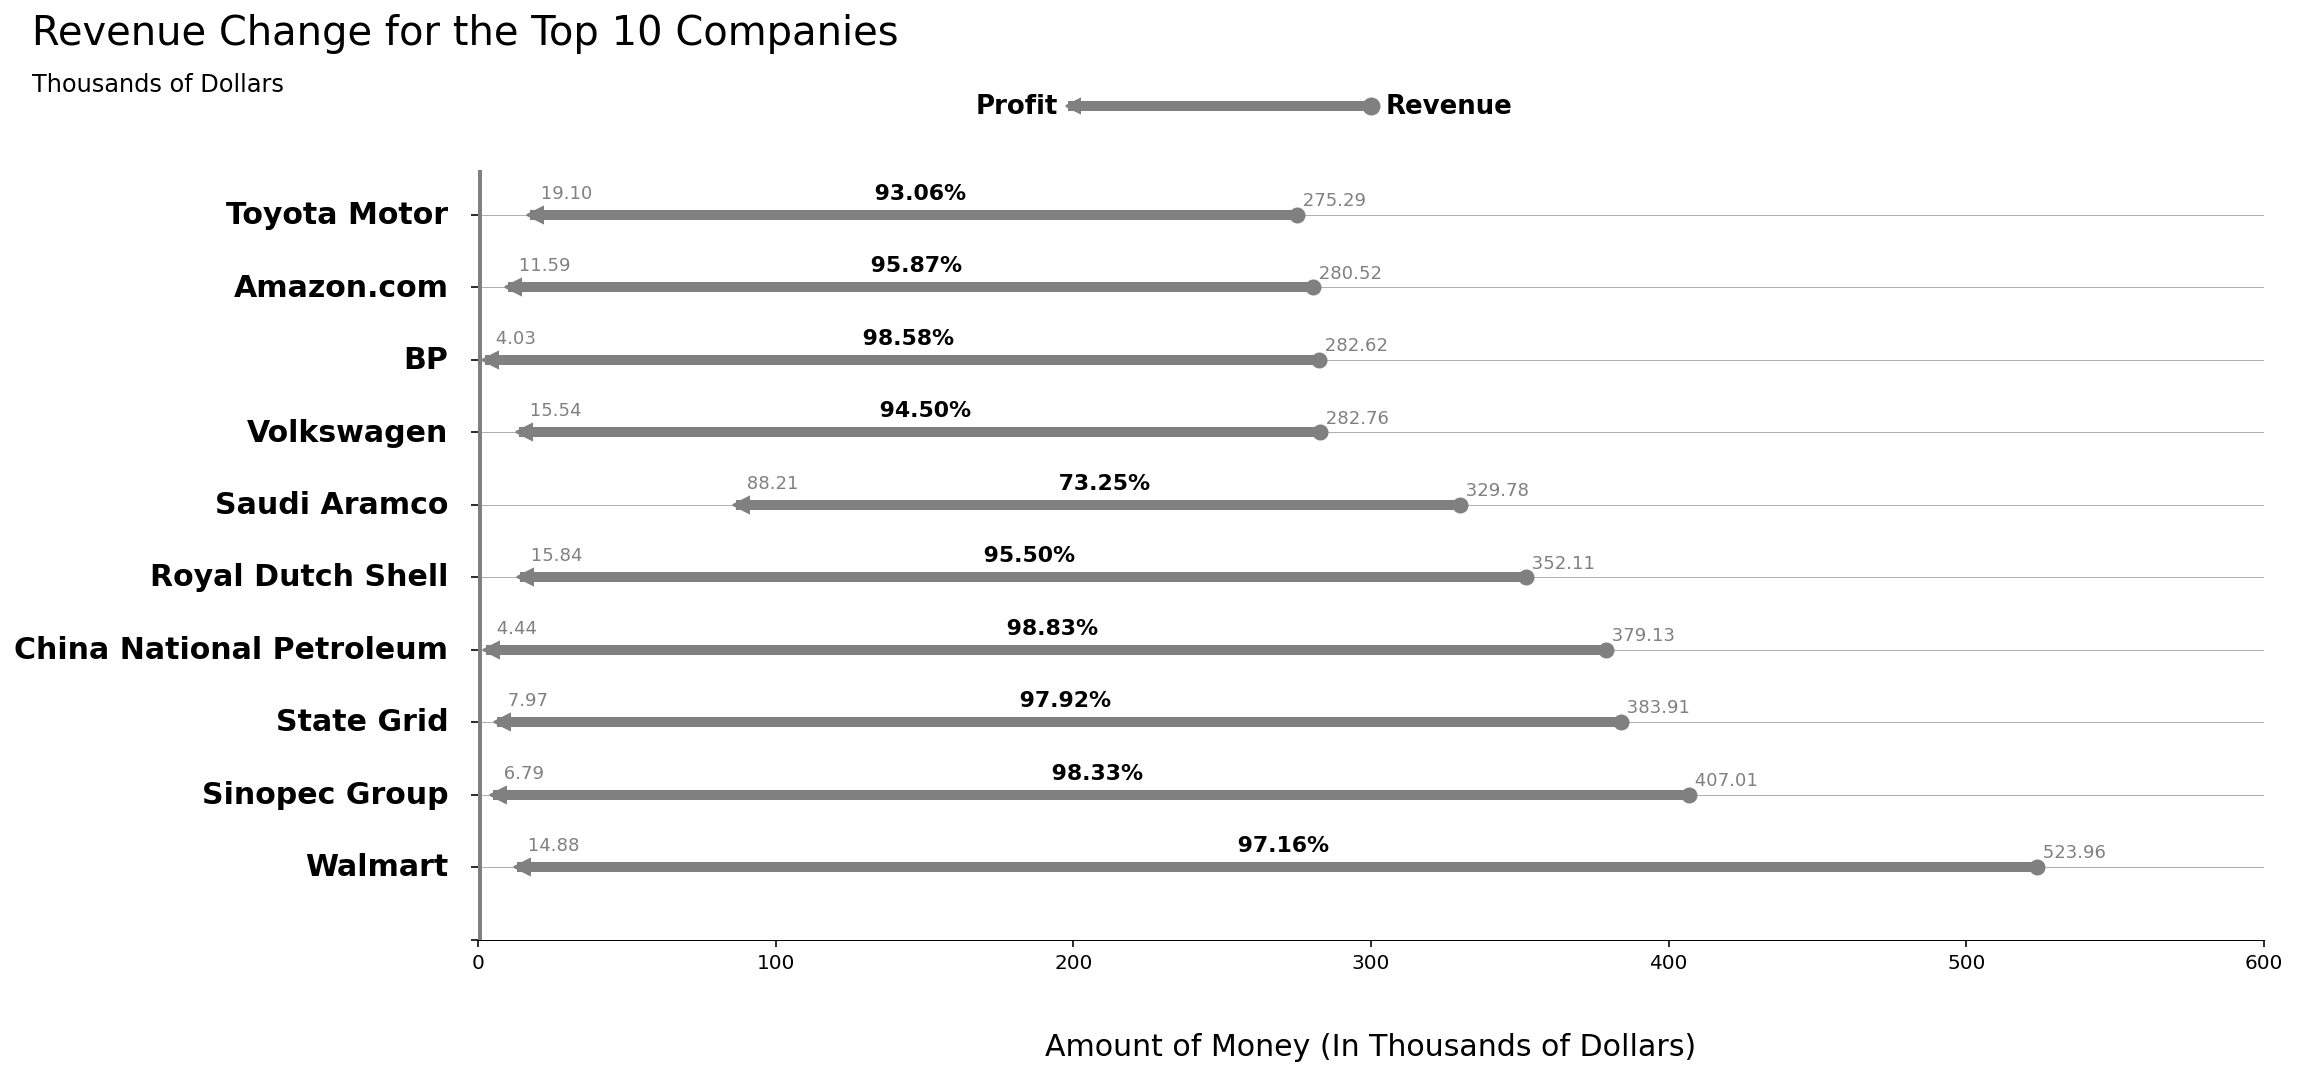

In [23]:
fig, ax = plt.subplots(figsize = (16, 8))


ax.set_xlim(0, 600)
ax.set_ylim(0, 1.2)
ax.set_yticks(np.arange(0, 1.1, 0.1))

ax.text(-150, 1.25, "Revenue Change for the Top 10 Companies", color = "black", 
       horizontalalignment = "left", verticalalignment = "center", fontsize = 20)
ax.text(-150, 1.18, "Thousands of Dollars", color = "black", horizontalalignment = "left", 
        verticalalignment = "center", fontsize = 12)

ax.set_yticklabels([])

for i,p in enumerate(new_top_10_companies["Name"].values): 
    ax.text(-10, (i + 1) * 0.1, p, color = "black", horizontalalignment = "right", 
        verticalalignment = "center", fontsize = 15, weight = 'bold')
    ax.plot([new_top_10_companies["Revenue"].values[i] / 1000], 
           [(i + 1) * 0.1], "o", markersize = 7, c = "grey")
    rev = new_top_10_companies["Revenue"].values[i] / 1000
    ax.text(new_top_10_companies["Revenue"].values[i] / 1000, 
           (i + 1) * 0.1 + 0.02, f"{rev: .2f}",  fontsize = 9, 
            c = "grey", horizontalalignment = 'left', verticalalignment = 'center')
    ax.plot([new_top_10_companies["Profit"].values[i]/ 1000], 
            [(i + 1) * 0.1], "<", markersize = 8, c = "grey")
    prof = new_top_10_companies["Profit"].values[i] / 1000
    ax.text(new_top_10_companies["Profit"].values[i] / 1000, 
           (i + 1) * 0.1 + 0.03, f"{prof: .2f}",  fontsize = 9, 
            c = "grey", horizontalalignment = 'left', verticalalignment = 'center')
    ax.plot([new_top_10_companies["Revenue"].values[i] / 1000, new_top_10_companies["Profit"].values[i]/ 1000], 
                [(i + 1) * 0.1, (i + 1) * 0.1], "-", lw = 5, c = "grey")
    percent = new_top_10_companies["Percent"][i]
    ax.text((new_top_10_companies["Revenue"].values[i] / 1000 + 
              new_top_10_companies["Profit"].values[i]/ 1000) / 2, (i + 1) * 0.1 + 0.03, 
           f"{percent: .2f}" + "%", horizontalalignment = "center", 
        verticalalignment = "center", fontsize = 11, weight = 'bold')
    

ax.plot([200], [1.15], "<", markersize = 7, c = "grey")
ax.plot([200, 300], [1.15, 1.15], lw = 5, c = "grey")
ax.plot([300], [1.15], "o", markersize = 8, c = "grey")
ax.text(195, 1.15, "Profit", weight = "bold", fontsize = 13, horizontalalignment = 'right', 
       verticalalignment = 'center')
ax.text(305, 1.15, "Revenue", weight = "bold", fontsize = 13, horizontalalignment = 'left', 
       verticalalignment = 'center')
ax.set_xlabel("Amount of Money (In Thousands of Dollars)", fontsize = 15, labelpad = 30)

ax.grid(axis = 'y', linewidth = .5)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_linewidth(.5)

plt.axvline(-0, 0, .88, linewidth = 4, c = "grey")

plt.show()

## Question 2

In [14]:
data = {'2019':[101, 78, 91, 77, 78, 71, 78, 62, 68, 50, 43, 41], 
        '2018':[38, 47, 49, 42, 42, 38, 43, 52, 49, 67, 74, 86]
       }
months = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November','December']
months_simplified = [i[:3] for i in months]

vehicles_sold = pd.DataFrame(data)

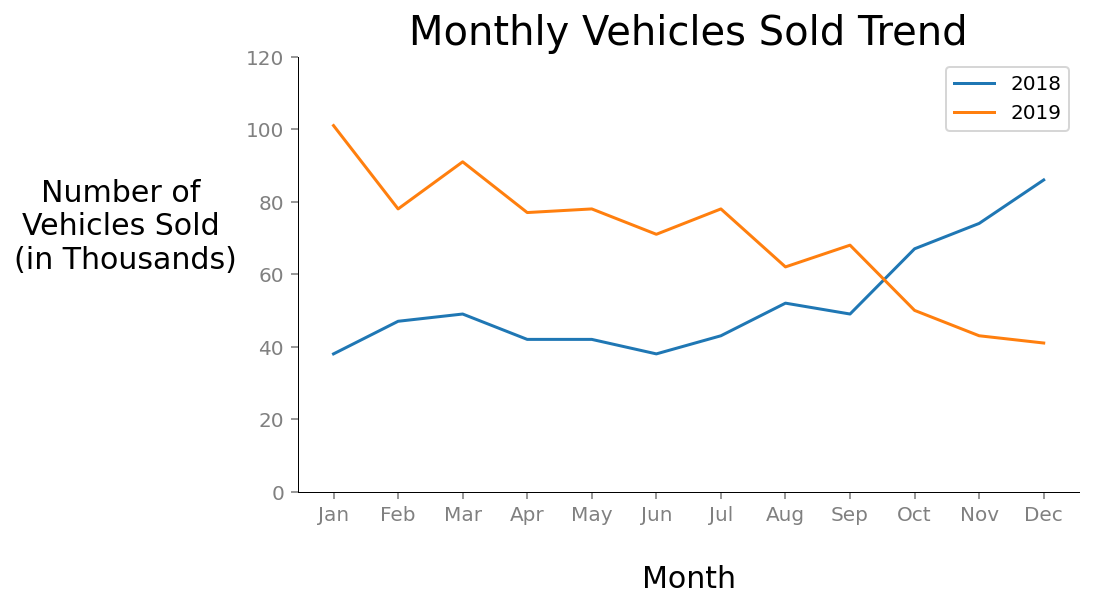

In [15]:
fig, ax = plt.subplots(figsize = (7, 4))

ax.set_ylim(0, 120)
ax.set_title("Monthly Vehicles Sold Trend", fontsize = 20)
ax.set_xlabel("Month", fontsize = 15, labelpad = 20)
ax.set_ylabel("Number of \nVehicles Sold \n(in Thousands)", rotation = 0, labelpad = 60, fontsize = 15)
ax.plot(months_simplified, vehicles_sold['2018'], label = "2018")
ax.plot(months_simplified, vehicles_sold['2019'], label = "2019")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5) 
ax.spines['bottom'].set_linewidth(.5)

ax.tick_params(axis = 'both', colors = 'gray')

plt.legend()
fig.patch.set_facecolor("white")
plt.show()

To declutter the graph from the figure in Storytelling with Data, I first removed the gridlines from the original graph as well as emphasized the title, the xlabel, and the ylabel with bigger fonts and more whitespace between the label and the axis lines. I also made the xticks and yticks a lighter shade since they are of lesser importance to the overall trend of the graph. I added a legend to show more specifically what each line represents and got rid of extra grid lines on the top and right and deemphasized the grid lines on the bottom and the left. This got rid of a lot of clutter and unnecessary information. Therefore, the audience can focus on the trends from the two lines. 